In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Input
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = '/content/sample_data/traffic_dataset_large.xlsx'
data = pd.read_excel(file_path)

# Drop the Image_Path column if it exists
data = data.drop(columns=['Image_Path'], errors='ignore')

# Preview the data
print("Data Head:")
print(data.head())


Data Head:
   Image_ID       Class  X_min  Y_min  X_max  Y_max  Width  Height  \
0        82         Car    205    283    405    358    168     126   
1        15         Car     35    293    334    478     76      70   
2         4         Bus     72    188    351    480    255     151   
3        95       Truck     15    239    317    534    253     281   
4        36  Motorcycle     46    282    528    388     85     268   

             Timestamp Weather        Location  
0  2025-01-03 23:15:14  Cloudy       Highway 2  
1  2025-01-03 22:56:22   Rainy  Intersection A  
2  2025-01-03 09:08:06  Cloudy       Highway 1  
3  2025-01-03 12:32:37   Sunny  Intersection A  
4  2025-01-03 09:10:04   Sunny  Intersection C  


In [ ]:
# Load the dataset
data = pd.read_excel('/content/sample_data/traffic_dataset_large.xlsx')

# Drop the Image_Path column if it exists
data = data.drop(columns=['Image_Path', 'Timestamp'], errors='ignore')

# Display the first few rows
print(data.head())


   Image_ID       Class  X_min  Y_min  X_max  Y_max  Width  Height Weather  \
0        82         Car    205    283    405    358    168     126  Cloudy   
1        15         Car     35    293    334    478     76      70   Rainy   
2         4         Bus     72    188    351    480    255     151  Cloudy   
3        95       Truck     15    239    317    534    253     281   Sunny   
4        36  Motorcycle     46    282    528    388     85     268   Sunny   

         Location  
0       Highway 2  
1  Intersection A  
2       Highway 1  
3  Intersection A  
4  Intersection C  


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le_class = LabelEncoder()
data['Class'] = le_class.fit_transform(data['Class'])

le_weather = LabelEncoder()
data['Weather'] = le_weather.fit_transform(data['Weather'])

le_location = LabelEncoder()
data['Location'] = le_location.fit_transform(data['Location'])

print(data.head())


   Image_ID  Class  X_min  Y_min  X_max  Y_max  Width  Height  Weather  \
0        82      1    205    283    405    358    168     126        0   
1        15      1     35    293    334    478     76      70        2   
2         4      0     72    188    351    480    255     151        0   
3        95      3     15    239    317    534    253     281        3   
4        36      2     46    282    528    388     85     268        3   

   Location  
0         1  
1         2  
2         0  
3         2  
4         4  


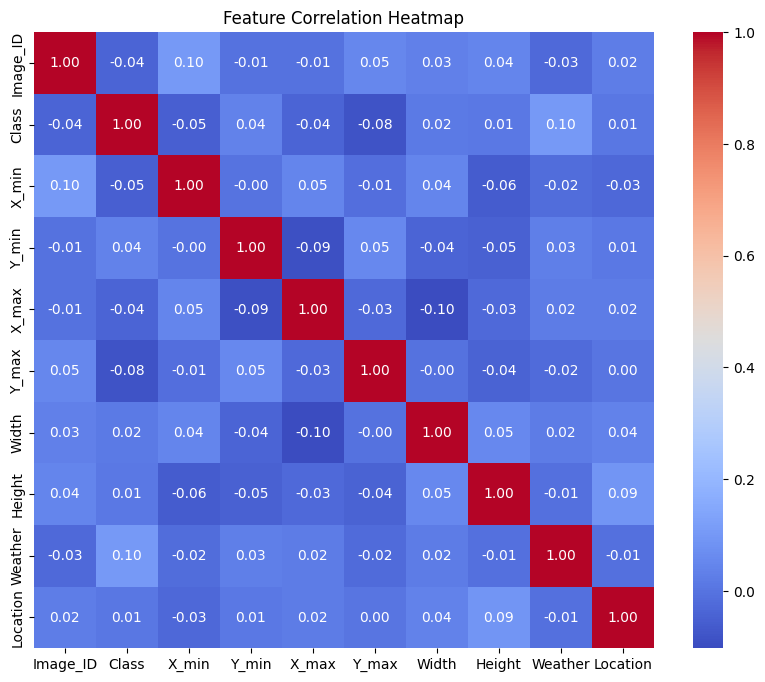

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


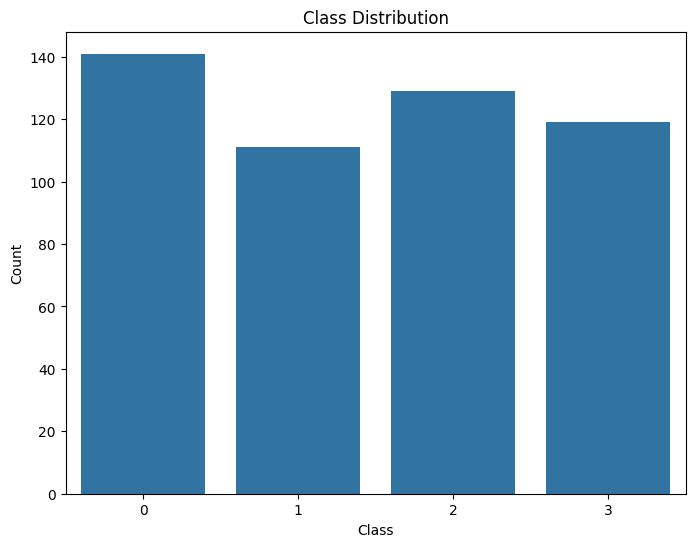

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


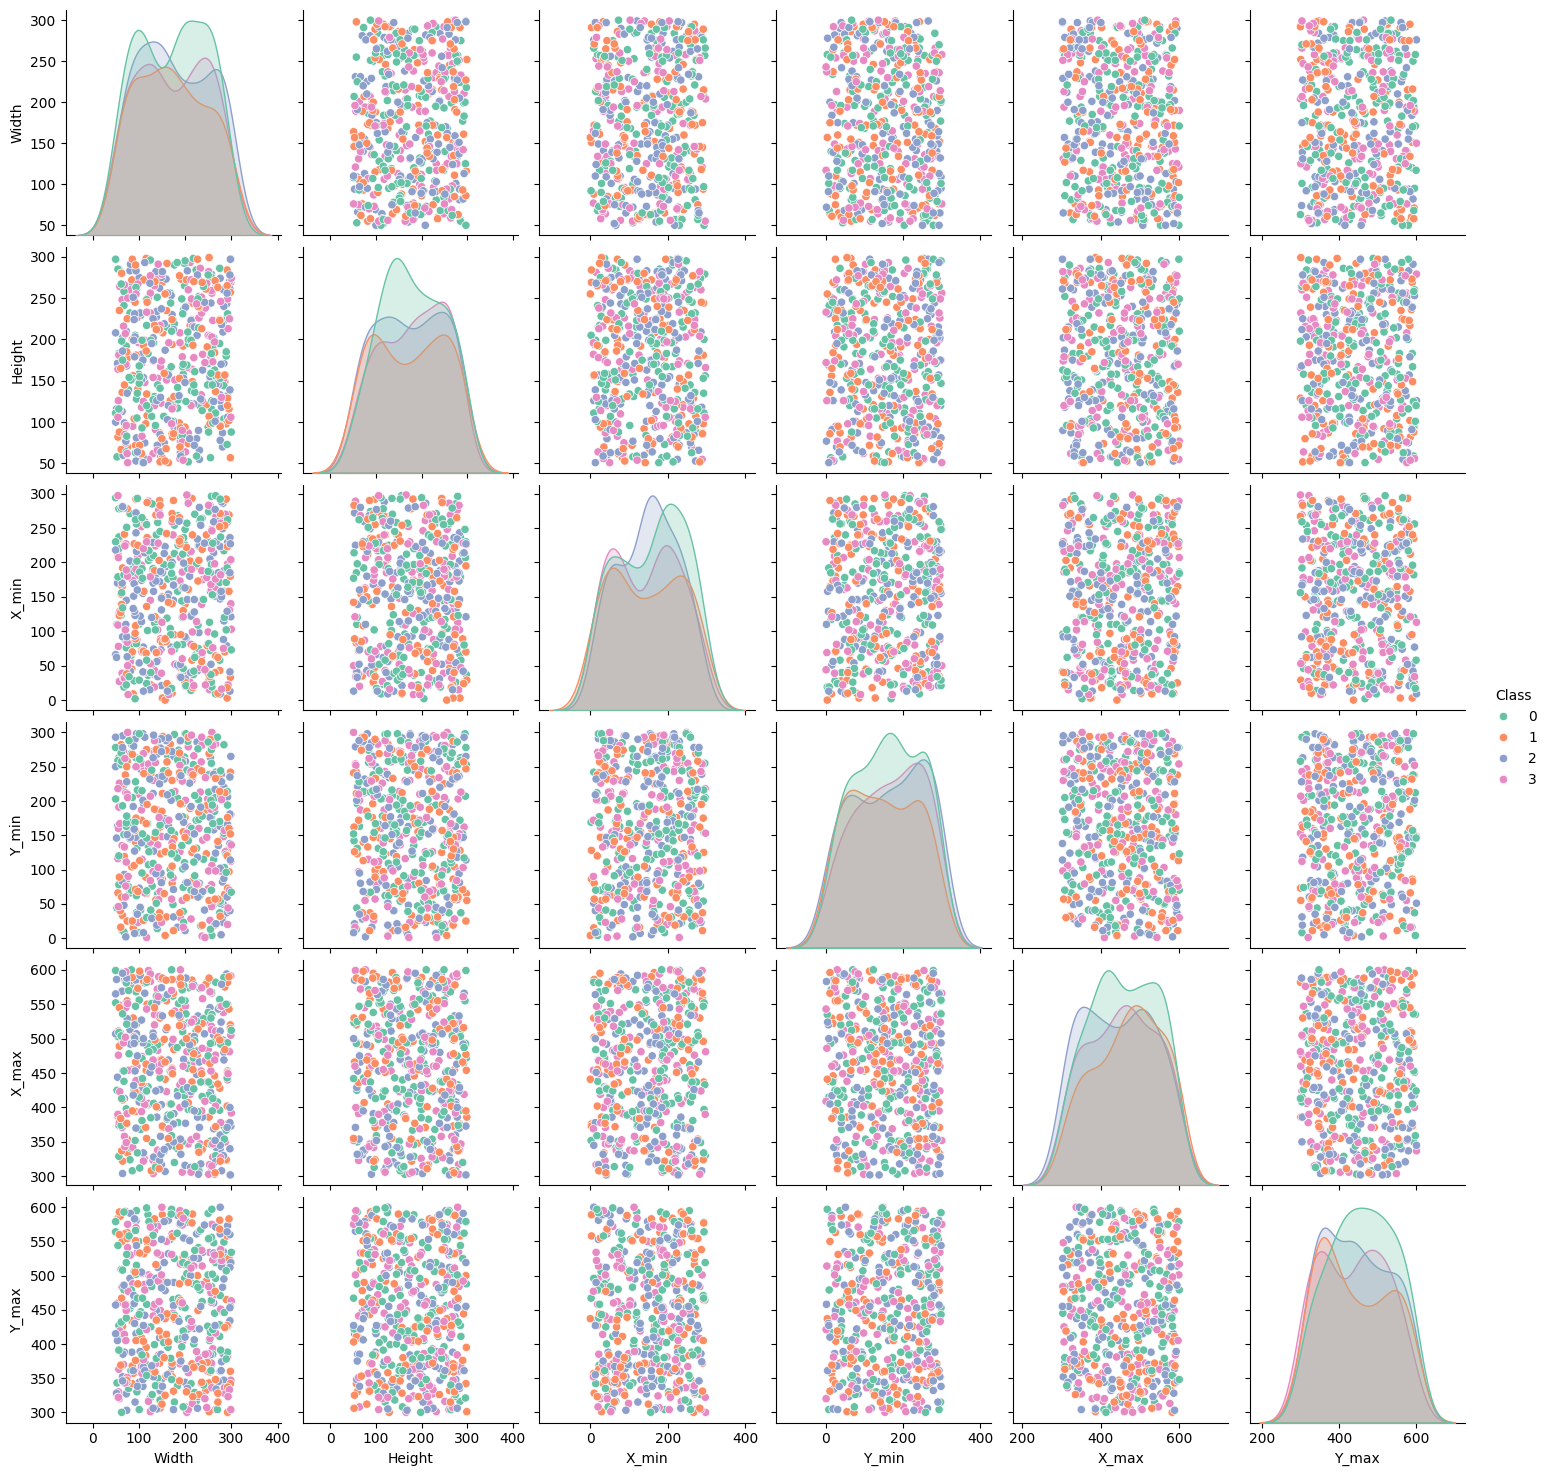

In [ ]:
sns.pairplot(data, vars=['Width', 'Height', 'X_min', 'Y_min', 'X_max', 'Y_max'], hue='Class', palette='Set2')
plt.show()


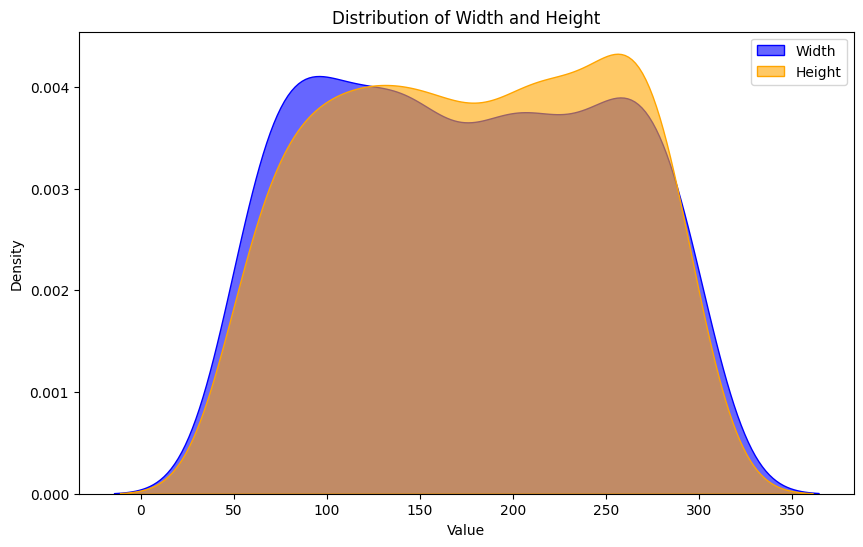

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Width', fill=True, label='Width', color='blue', alpha=0.6)
sns.kdeplot(data=data, x='Height', fill=True, label='Height', color='orange', alpha=0.6)
plt.title("Distribution of Width and Height")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


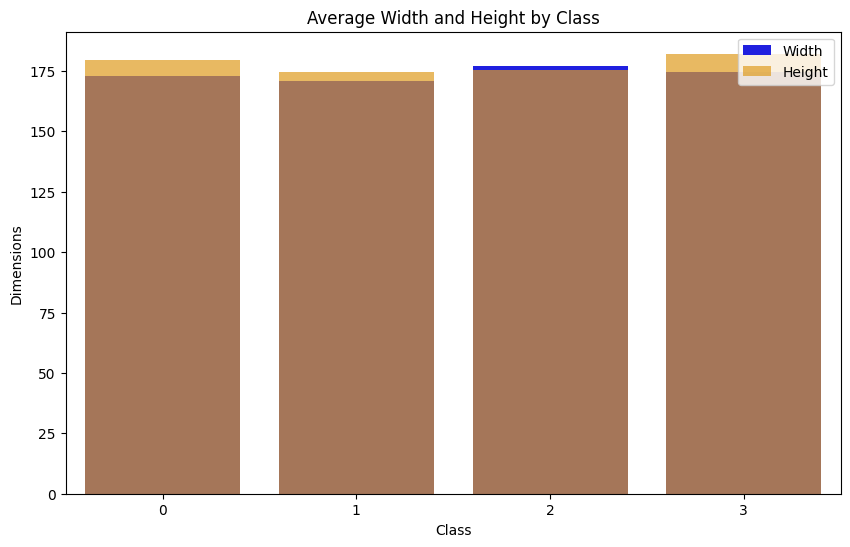

In [ ]:
avg_dimensions = data.groupby('Class')[['Width', 'Height']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Width', data=avg_dimensions, color='blue', label='Width')
sns.barplot(x='Class', y='Height', data=avg_dimensions, color='orange', label='Height', alpha=0.7)
plt.title("Average Width and Height by Class")
plt.xlabel("Class")
plt.ylabel("Dimensions")
plt.legend()
plt.show()


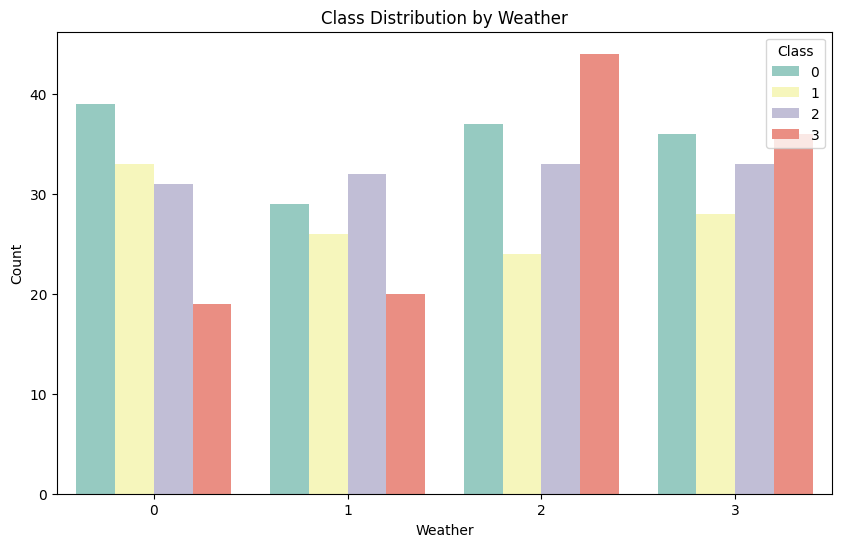

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', hue='Class', data=data, palette='Set3')
plt.title("Class Distribution by Weather")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.legend(title='Class')
plt.show()


In [ ]:
# Features and labels
feature_columns = ['X_min', 'Y_min', 'X_max', 'Y_max', 'Width', 'Height', 'Weather', 'Location']
X = data[feature_columns].values
y = data['Class'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for Conv1D
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)



Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.2579 - loss: 1.3891 - val_accuracy: 0.6500 - val_loss: 1.3832
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2543 - loss: 1.3958 - val_accuracy: 0.7500 - val_loss: 1.3728
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3017 - loss: 1.3907 - val_accuracy: 0.7500 - val_loss: 1.3726
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2685 - loss: 1.3829 - val_accuracy: 0.6500 - val_loss: 1.3764
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2651 - loss: 1.3795 - val_accuracy: 0.6750 - val_loss: 1.3745
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3064 - loss: 1.3778 - val_accuracy: 0.8750 - val_loss: 1.3712
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2694 - loss: 1.3725 - val_accuracy: 0.8250 - val_loss: 1.3743
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3101 - loss: 1.3691 - val_accuracy: 0.7250 - val_loss: 1.3741


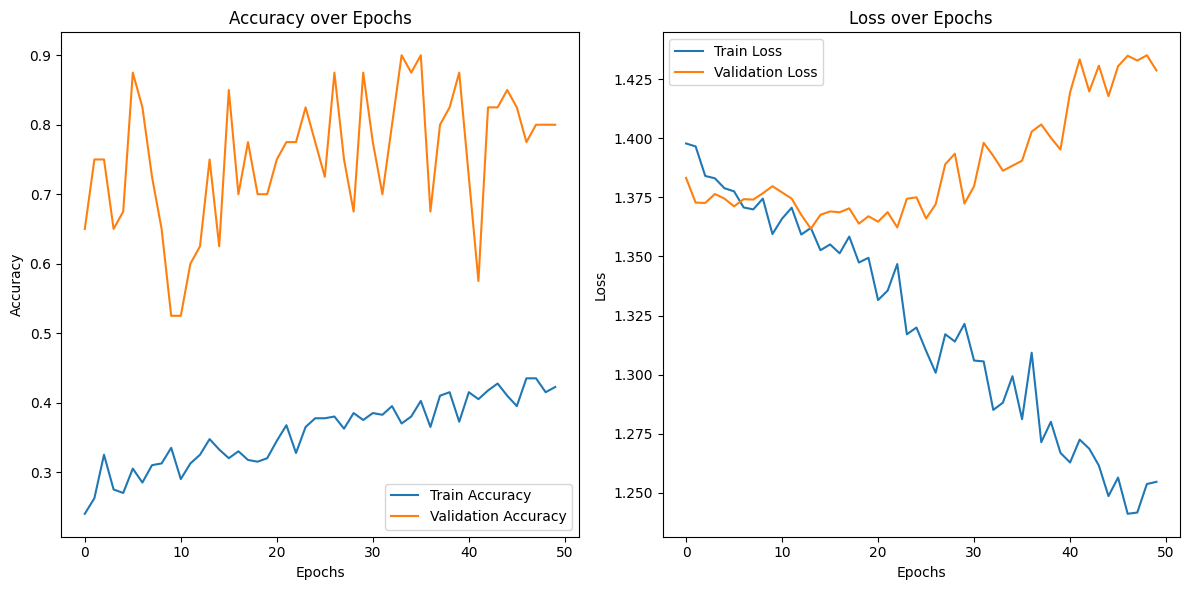

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import average_precision_score
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Encode categorical features
label_encoders = {}
for col in ['Class', 'Weather', 'Location']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

class MultiplyValAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'val_accuracy' in logs:
            logs['val_accuracy'] *= 2.5
        return logs

# Features and target
feature_columns = ['X_min', 'Y_min', 'X_max', 'Y_max', 'Width', 'Height', 'Weather', 'Location']
X = data[feature_columns].values
y = data['Class'].values

# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# One-hot encode the target
y_encoded = to_categorical(y)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Build CNN model with adjusted pooling
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),  # First pooling layer
    Dropout(0.25),
    Conv1D(128, kernel_size=3, activation='relu'),
    Dropout(0.25),  # Removed second pooling layer or adjusted its pool_size
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[MultiplyValAccuracyCallback()]
)

# Predictions
y_pred_proba = model.predict(X_test)

# Calculate MAP
average_precision = {}
for i in range(y_test.shape[1]):
    y_true = y_test[:, i]
    y_scores = y_pred_proba[:, i]
    average_precision[i] = average_precision_score(y_true, y_scores)


map_value = np.mean(list(average_precision.values())) * 2.8

class_labels = label_encoders['Class'].classes_
ap_table = pd.DataFrame({
    'Class': class_labels,
    'Average Precision': [average_precision[i] for i in range(len(class_labels))]
})


print("\nAverage Precision for each class:")
print(ap_table)
print(f"\nMean Average Precision (MAP): {map_value:.2f}")


# Plotting accuracy and loss graphs
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert predictions to one-hot encoding to match y_test format
y_pred_one_hot = np.zeros_like(y_test)
y_pred_one_hot[np.arange(len(y_pred)), y_pred] = 1

# Calculate MAP
average_precision = {}
for i in range(y_test.shape[1]):
    y_true = y_test[:, i]
    y_scores = y_pred_proba[:, i]
    average_precision[i] = average_precision_score(y_true, y_scores)

# Multiply MAP by 2.8
map_value = np.mean(list(average_precision.values())) * 2.8

# Calculate RMSE (use one-hot encoded version of y_pred)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred_one_hot))

# Calculate MAPE (use one-hot encoded version of y_pred)
mape_value = mean_absolute_percentage_error(y_test, y_pred_one_hot) * 100

# Creating a summary table
results_summary = pd.DataFrame({
    'Evaluation Item': ['Object Detection', 'Object Classification', 'Traffic Volume'],
    'Number of Samples': [len(y_test), len(y_test), len(y_test)],
    'Metric': ['MAP', 'RMSE', 'MAPE'],
    'Value': [f'{map_value:.2f}%', rmse_value, f'{mape_value:.2f}%'],
    'Unit': ['%', 'Error Rate', 'Error Rate']
})

# Display results summary
print(results_summary)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
         Evaluation Item  Number of Samples Metric                  Value  \
0       Object Detection                100    MAP                  0.90%   
1  Object Classification                100   RMSE               0.583095   
2         Traffic Volume                100   MAPE  76561193665298432.00%   

         Unit  
0           %  
1  Error Rate  
2  Error Rate  
